In [18]:
import os
import pickle
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV

In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [13]:
cwd = os.getcwd()
df_2013 = pd.read_pickle(os.path.join(cwd,'C:\\Users\\hp\\Desktop\\FINAL YEAR PROJECT\\DATASET','df_2013_features.df'))
df_2014 = pd.read_pickle(os.path.join(cwd,'C:\\Users\\hp\\Desktop\\FINAL YEAR PROJECT\\DATASET','df_2014_features.df'))

In [14]:
df_all = pd.concat([df_2013,df_2014])

## LEARNING CURVES

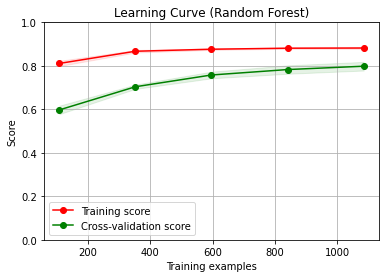

In [17]:
X, y = X_train, y_train
title = "Learning Curve (Random Forest)"
est = RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt', 
                            min_samples_split=10, min_samples_leaf = 2, max_depth=7 )
plot_learning_curve(est, title, X, y, ylim=(0, 1.0), cv=kf, n_jobs=-1)
plt.show()


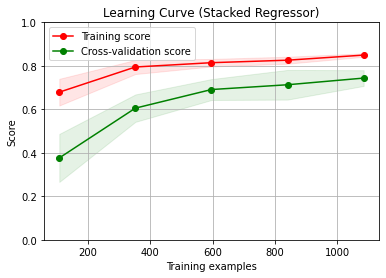

In [20]:
X, y = X_train, y_train
title = "Learning Curve (Stacked Regressor)"
estimators = [
('Random Forest', RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt',min_samples_split=10, min_samples_leaf = 5, max_depth=8)),
('Gradient boosted Regression1' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression2' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls'))
]
#Stack
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
plot_learning_curve(reg, title, X, y, ylim=(0, 1.0), cv=kf, n_jobs=-1)
plt.show()

# Performance of stacked generalization regressor

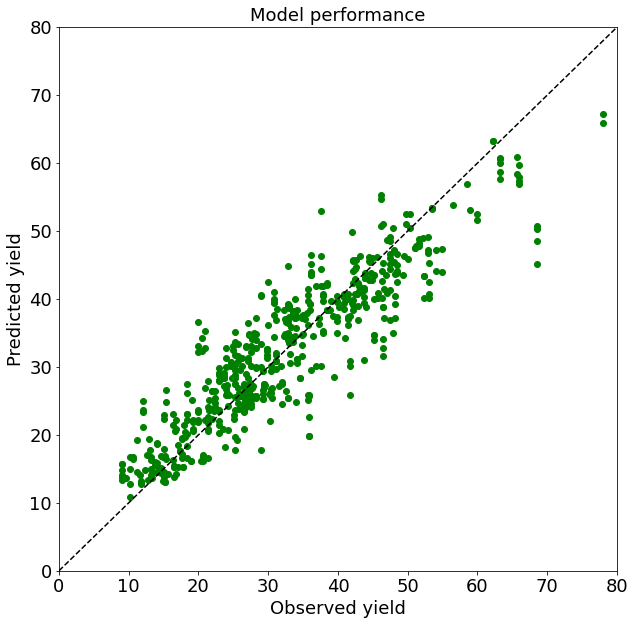

In [23]:
X, y = X_train, y_train
estimators = [
('Random Forest', RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt',min_samples_split=10, min_samples_leaf = 5, max_depth=8)),
('Gradient boosted Regression1' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression2' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls'))
]
#Stack
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))

y_pred = est.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(y_test,y_pred, color='green')
plt.plot([0,80],[0,80],'--', color='k')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

ax.set_title('Model performance',fontsize=18)
# ax.xlabels().set_fontsize(20)
ax.set_xlabel('Observed yield', fontsize=18)
ax.set_ylabel('Predicted yield', fontsize=18)
ax.tick_params(labelsize=18)

ratio_gbt = y_test/y_pred


plt.savefig(os.path.join(cwd,'images','model_performance.png'), bbox_inches='tight')

# CORRELATION MATRIX

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: nticks
  if __name__ == '__main__':


Text(0.5, -0.1, 'Correlation matrix')

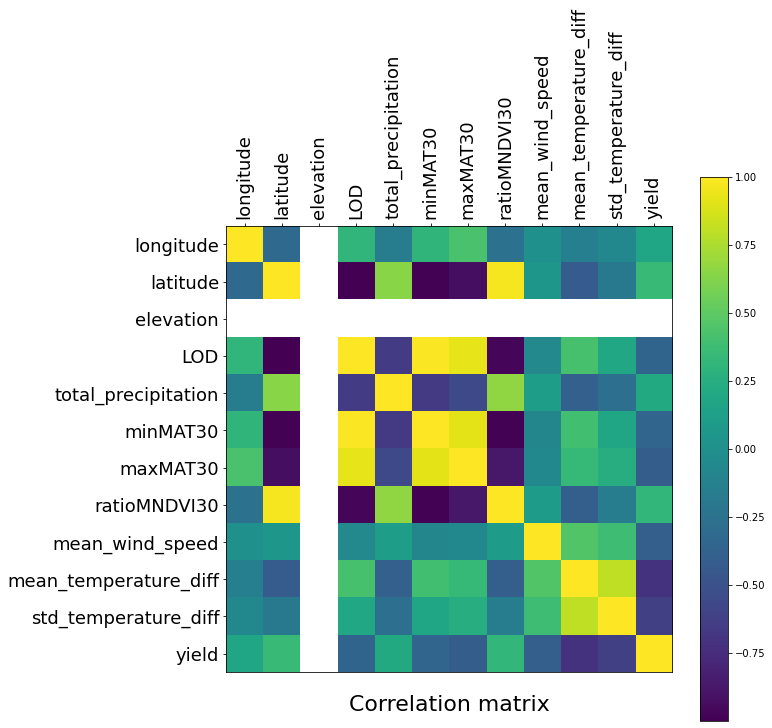

In [33]:
# Plot correlation matrix - Spearman
# Adjust labels to include all column names
fig, ax = plt.subplots(figsize=(10, 10))
# condition on which columns to carry over
corr =  df_2013.corr(method='spearman')
plt.imshow(corr,interpolation='none')
# Add colorbar
plt.colorbar()
plt.locator_params(axis='x', nticks=9)
labels = corr.columns
# Set custom tick labels - these two lines are where the deprecation warning originates
ax.set_xticklabels([''] + labels,rotation=90)
ax.set_yticklabels([''] + labels)
# Move x-axis labels to top
ax.xaxis.set_ticks_position('top')
# Set axis label size
ax.tick_params(labelsize=18)
# Adjust tick position x-axis
start, end = ax.get_xlim()
stepsize = 1.0
ax.set_xticks(np.arange(start+0.5,end+0.5, stepsize))
ax.set_xlim(start,end)
# Adjust tick position yaxis
start, end = ax.get_ylim()
stepsize = 1.0
ax.set_yticks(np.arange(end+0.5,start+0.5, stepsize))
ax.set_ylim(start,end)
# Add title
ax.set_title('Correlation matrix', fontsize=22,y=-0.1)
# Save figure
# plt.savefig(os.path.join(supp_dir,'correlation_matrix.png'), bbox_inches='tight')